In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
DATA_PATH = "../data/"

In [5]:
polygon_df = pd.read_json(path_or_buf=f"{DATA_PATH}polygons.jsonl", lines=True)
polygon_df

,id,annotations
0,0006ff2aa7cd,"[{'type': 'glomerulus', 'coordinates': [[[167,..."
1,00168d1b7522,"[{'type': 'glomerulus', 'coordinates': [[[511,..."
2,0033bbc76b6b,"[{'type': 'blood_vessel', 'coordinates': [[[16..."
3,003504460b3a,"[{'type': 'blood_vessel', 'coordinates': [[[40..."
4,004daf1cbe75,"[{'type': 'blood_vessel', 'coordinates': [[[14..."
...,...,...
1628,ff434af74304,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1629,ff4897b3eda6,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1630,ff66dec71c4c,"[{'type': 'blood_vessel', 'coordinates': [[[11..."
1631,ff99cdef0f2a,"[{'type': 'blood_vessel', 'coordinates': [[[24..."


In [18]:
df_flattened = polygon_df.explode('annotations')
temp_df = df_flattened['annotations'].apply(pd.Series)
poly_df = pd.concat([polygon_df['id'], temp_df], axis=1)
poly_df.reset_index(inplace=True, drop=True)
poly_df.head(20)

,id,type,coordinates
0,0006ff2aa7cd,glomerulus,"[[[167, 249], [166, 249], [165, 249], [164, 24..."
1,0006ff2aa7cd,blood_vessel,"[[[283, 109], [282, 109], [281, 109], [280, 10..."
2,0006ff2aa7cd,blood_vessel,"[[[104, 292], [103, 292], [102, 292], [101, 29..."
3,0006ff2aa7cd,blood_vessel,"[[[505, 442], [504, 442], [503, 442], [502, 44..."
4,0006ff2aa7cd,blood_vessel,"[[[375, 477], [374, 477], [373, 477], [372, 47..."
5,0006ff2aa7cd,blood_vessel,"[[[368, 410], [367, 410], [366, 410], [365, 41..."
6,0006ff2aa7cd,blood_vessel,"[[[339, 249], [338, 249], [337, 249], [336, 24..."
7,0006ff2aa7cd,blood_vessel,"[[[352, 67], [351, 67], [350, 67], [349, 67], ..."
8,0006ff2aa7cd,blood_vessel,"[[[227, 299], [226, 299], [225, 299], [224, 29..."
9,00168d1b7522,glomerulus,"[[[511, 216], [511, 216], [510, 216], [509, 21..."


In [9]:
sample_image_name = poly_df['id'][0]
sample_img_path = f"{DATA_PATH}train/{sample_image_name}.tif"
sample_img_path

'../data/train/0006ff2aa7cd.tif'

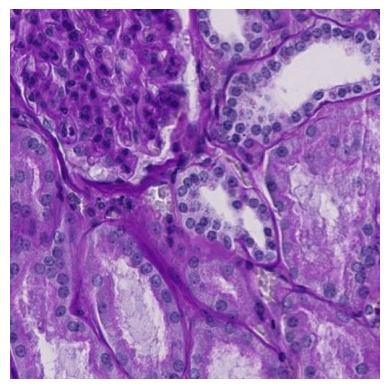

In [12]:
base_image = Image.open(sample_img_path)
plt.imshow(base_image)
plt.axis('off')
plt.show()

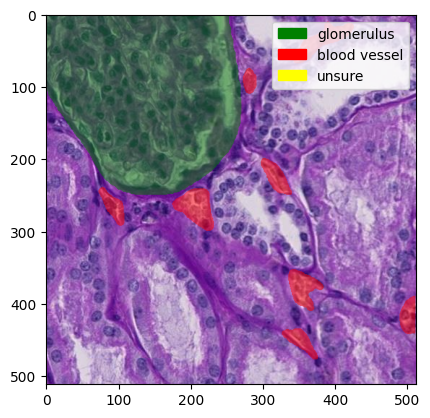

In [50]:
import matplotlib.patches as mpatches

def plot_img(polygon_data, image_name):
    img_data = polygon_data.query('id == @image_name')
    img_data.reset_index(inplace=True, drop=True)

    image_path = f"{DATA_PATH}train/{image_name}.tif"
    image = Image.open(image_path)

    # Create legend patches
    legend_elements = [mpatches.Patch(color='green', label='glomerulus'),
                       mpatches.Patch(color='red', label='blood vessel'),
                       mpatches.Patch(color='yellow', label='unsure')]

    for idx, row in img_data.iterrows():
        if row['type'] == 'glomerulus':
            color = 'green'
        elif row['type'] == 'blood_vessel':
            color = 'red'
        else:
            color = 'yellow'

        sublist = row['coordinates'][0]
        x = []
        y = []

        for datapoint in sublist:
            x.append(datapoint[0])
            y.append(datapoint[1])

        plt.scatter(x, y, s=0)
        plt.fill(x, y, color, alpha=0.5)

    plt.imshow(image)
    # Add the legend to the plot
    plt.legend(handles=legend_elements, loc='upper right')

image_name = poly_df['id'][0]
plot_img(poly_df, image_name)

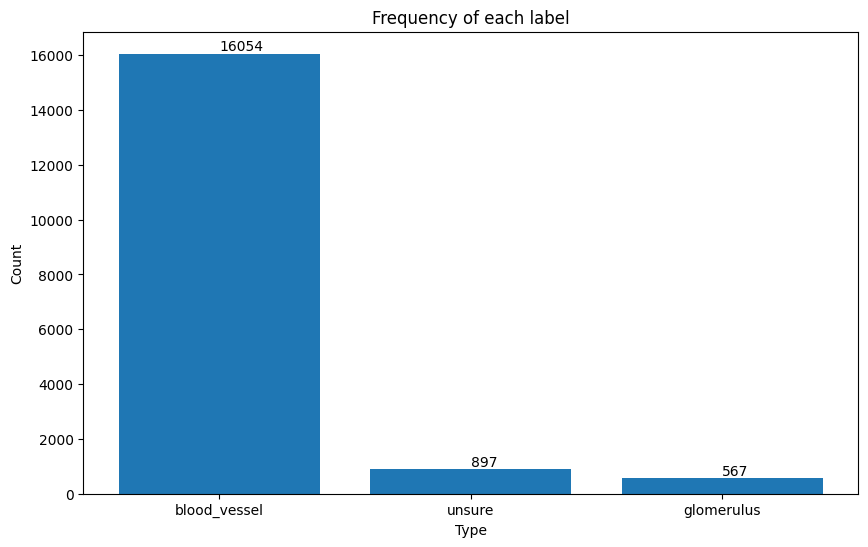

In [52]:
type_counts = poly_df['type'].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(type_counts.index, type_counts.values)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Frequency of each label')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()

In [56]:
df_meta = pd.read_csv(f'{DATA_PATH}tile_meta.csv')
df_meta

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008
...,...,...,...,...,...
7028,ffd37b5c6598,13,3,13824,21504
7029,ffd3d193c71e,3,2,7680,16896
7030,ffd77e2517af,13,3,15872,28160
7031,ffe3cbb81f72,10,3,15456,23000


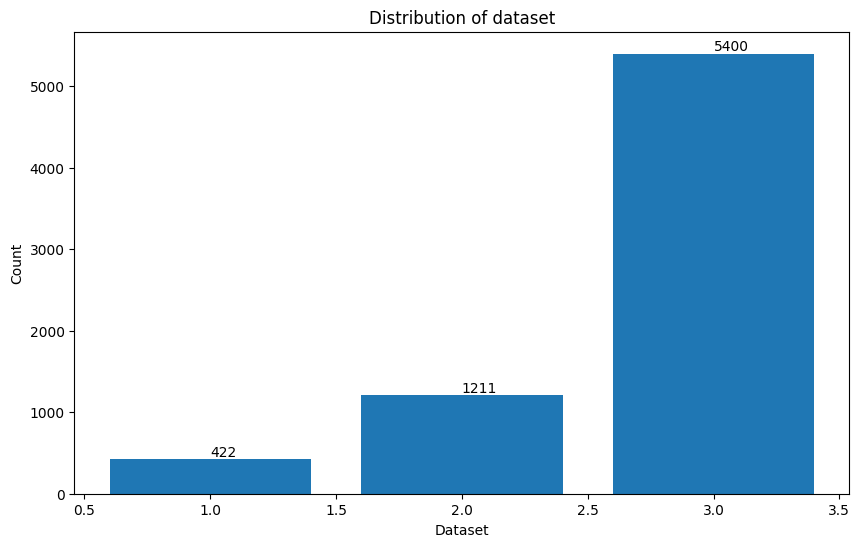

In [57]:
dataset_counts = df_meta['dataset'].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(dataset_counts.index, dataset_counts.values)

plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Distribution of dataset')

# Add the actual count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()